This notebook explores the  different UL samples to try to decide what to use for the official signal request. It follows the set of datacards described in the google doc: https://docs.google.com/document/d/1t-wRwXuBq7QfTctBOYz2dBzkOJs4_CwTqbiYhqtyaVU/edit#

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
#plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()

In [2]:
location_cfg = "../configs/ntuple_locations.yaml"
ntuple_version="ffntuple_UL"
sample_base = "2Mu2E_100GeV_0p8GeV_"

samples = [
    "bestGuess_6",
    "bestGuess_60",
    "fromPR_0p6",
    "fromPR_6",
    "fromPR_60",
    "fromPRv2_60",
    "massiveB_60",
    "noImportSM_60",
    "noMatching_60",
    "removeDefaults_60",
    "removeNewg_60",
    "removeNewgToF_60",
    "updatePtDr_60",
    "xqcut_60"   
]
locations = utilities.load_yaml(location_cfg)[ntuple_version]

fileset = {}

for sample in samples:
    sample_fullname = sample_base + sample
    base_path = locations["path"] + locations["samples"][sample_fullname]["path"]
    file_list = [base_path +f for f in locations["samples"][sample_fullname]["files"]]
    fileset[sample] = file_list

In [3]:
#If I wanted to use utilities.make_fileset I could. The only difference would be the key names in the processor output.
#sample_fullnames = []
#for sample in samples:
#    sample_fullname = sample_base + sample
#    sample_fullnames.append(sample_fullname)
#fileset2 = utilities.make_fileset(sample_fullnames, "ffntuple_UL")

In [4]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "base",
        "2mu2e"
    ],
    ["base_plus_gen"],
    unweighted=True
)

output = runner(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

In [5]:
output["bestGuess_6"]["cutflow"]["2mu2e"].print_table(unweighted=True)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             15910.0      15910.0
PV filter                15910.0      15910.0
Cosmic veto              15910.0      15910.0
>=2 LJs                   5421.0       5421.0
2mu2e                     5418.0       5418.0


In [6]:
hists = output["bestGuess_6"]["hists"]
for key in hists:
    print(key)

pv_n
pv_ndof
pv_z
pv_rho
electron_n
electron_pt
electron_eta_phi
photon_n
photon_pt
photon_eta_phi
muon_n
muon_pt
muon_d0
muon_eta_phi
dsaMuon_n
dsaMuon_pt
dsaMuon_eta_phi
lj_n
lj_pt
egm_lj_pt
mu_lj_pt
lj0_pt
lj1_pt
lj0_e
lj1_e
lj_eta_phi
lj_electronN
lj_photonN
lj_electronPhotonN
lj_muonN
ljsource_n
ljsource_pt
ljsource_eta_phi
ljsource_charge
ljsource_type
electron_lj_dR
electron_lj_dR_lowRange
photon_lj_dR
photon_lj_dR_lowRange
photon_lj_dR_reallyLowRange
muon_lj_dR
muon_lj_dR_lowRange
dsaMuon_lj_dR
dsaMuon_lj_dR_lowRange
lj_lj_absdphi
lj_lj_invmass
lj_lj_invmass_lowRange
lj_pfIsolation05
lj0_pfIsolation05
lj1_pfIsolation05
lj_pfIsolationPtNoPU05
lj_pfIsolationPt05
lj_pfIsolation07
lj_pfIsolationPtNoPU07
lj_pfIsolationPt07
lj_pfiso
abcd_lj_lj_dphi_vs_lj0_pfIsolationPt05
gen_abspid
genE_pt
genE_eta_phi
genE0_pt
genE1_pt
genE0_pt_highRange
genE1_pt_highRange
genE_genE_dR
genE_genE_pt
genMu_pt
genMu_eta_phi
genMu0_pt
genMu1_pt
genMu0_pt_highRange
genMu1_pt_highRange
genMu_genMu_dR
genM

# Select histograms

## Gen pt plots

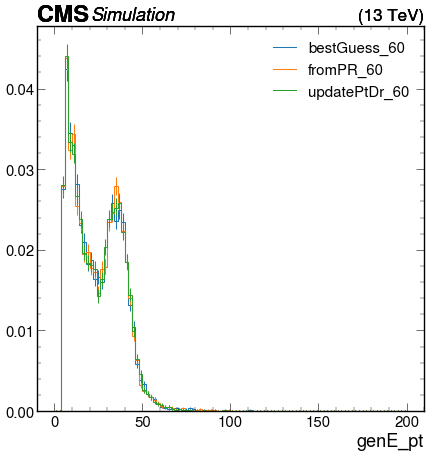

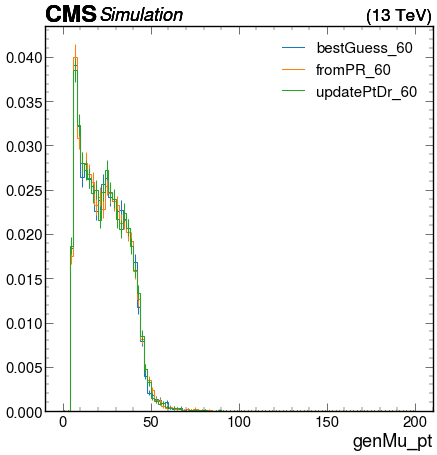

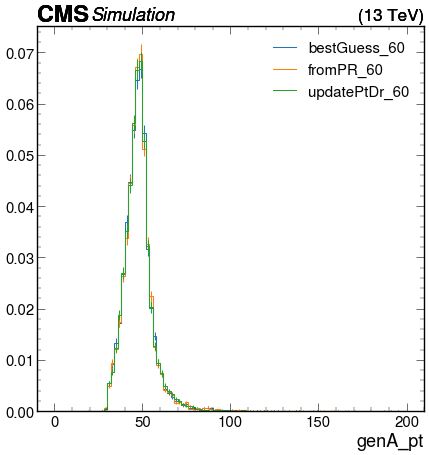

In [7]:
channel = "2mu2e"
hists = ["genE_pt","genMu_pt","genA_pt"]
subsamples = ["bestGuess_60","fromPR_60","updatePtDr_60"]
#subsamples = ["bestGuess_60","fromPR_60","removeNewgToF_60","updatePtDr_60","xqcut_60"]
#subsamples = samples

for hist in hists:
    for subsample in subsamples:
        utilities.plot(output[subsample]["hists"][hist][channel,:], density=True)
    
    #plt.yscale("log")
    
    plt.legend(subsamples,loc='upper right')
    plt.show()

## Eta phi plots

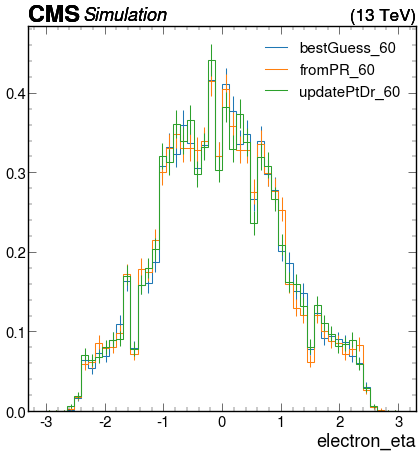

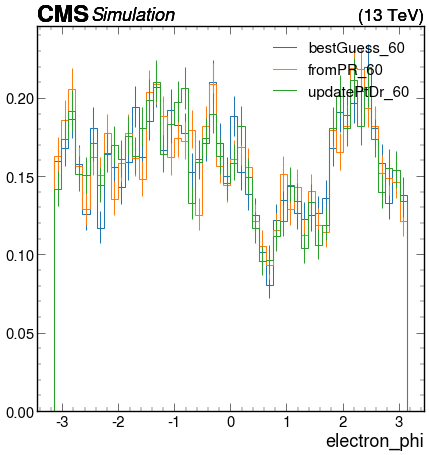

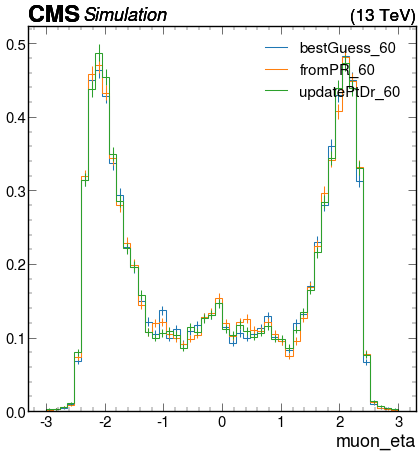

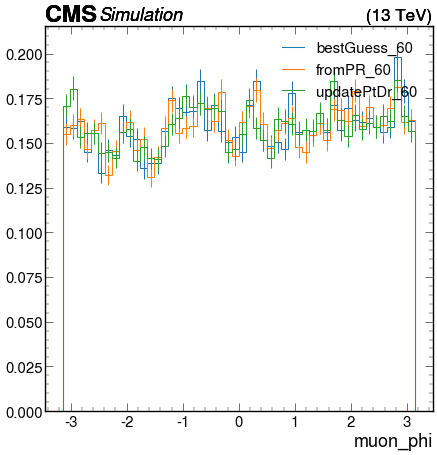

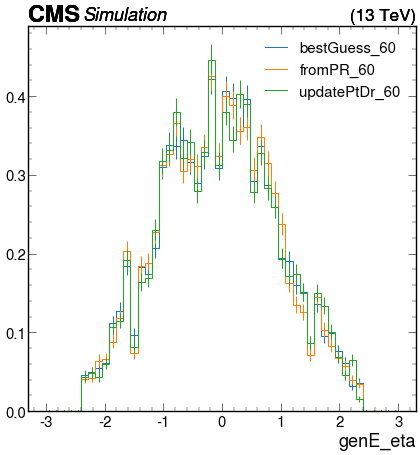

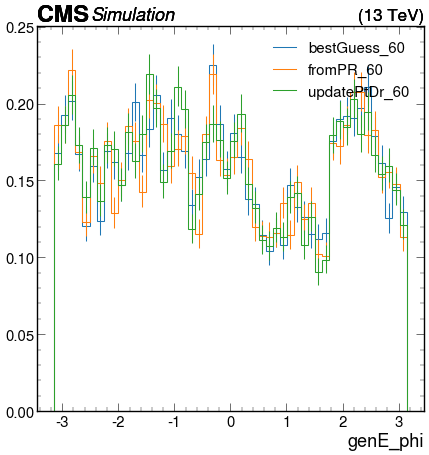

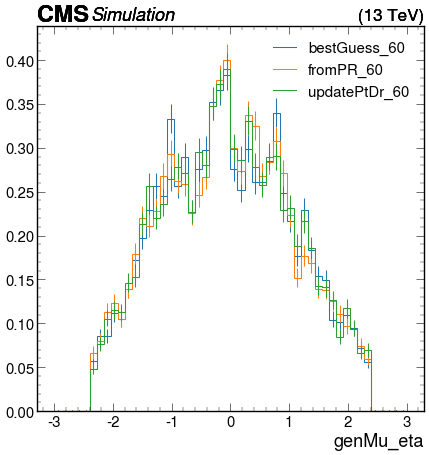

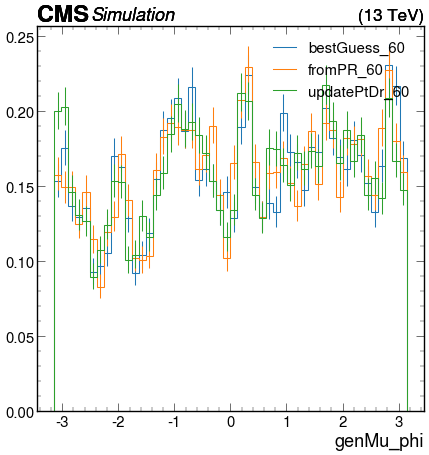

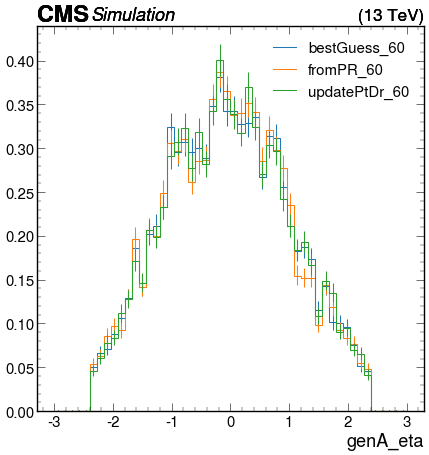

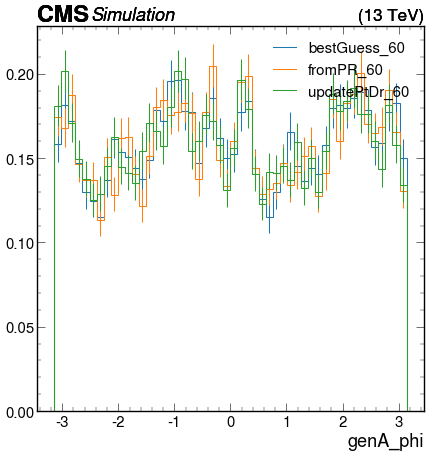

In [8]:
channel = "base"
subsamples = ["bestGuess_60","fromPR_60","updatePtDr_60"]
#subsamples = ["bestGuess_60","fromPR_60","removeNewgToF_60","updatePtDr_60","xqcut_60"]
#subsamples = samples

################
hist = "electron_eta_phi"
for subsample in subsamples:
    #output[subsample]["hists"][hist].project("electron_eta")
    #hep.histplot( density = True
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("electron_eta"), density=True)   
#plt.yscale("log")   
plt.legend(subsamples,loc='upper right')
plt.show()
    
for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("electron_phi"), density=True) 
#plt.yscale("log") 
plt.legend(subsamples,loc='upper right')
plt.show()

################
################
hist = "muon_eta_phi"
for subsample in subsamples:
    #output[subsample]["hists"][hist].project("electron_eta")
    #hep.histplot( density = True
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("muon_eta"), density=True)   
#plt.yscale("log")   
plt.legend(subsamples,loc='upper right')
plt.show()
    
for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("muon_phi"), density=True) 
#plt.yscale("log") 
plt.legend(subsamples,loc='upper right')
plt.show()
################
################
hist = "genE_eta_phi"
for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("genE_eta"), density=True)  
#plt.yscale("log")  
plt.legend(subsamples,loc='upper right')
plt.show()

for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("genE_phi"), density=True)
#plt.yscale("log")
plt.legend(subsamples,loc='upper right')
plt.show()

################
################
hist = "genMu_eta_phi"
for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("genMu_eta"), density=True) 
#plt.yscale("log")
plt.legend(subsamples,loc='upper right')
plt.show()

for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("genMu_phi"), density=True)
#plt.yscale("log")
plt.legend(subsamples,loc='upper right')
plt.show()

################
################
hist = "genA_eta_phi"
for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("genA_eta"), density=True)
#plt.yscale("log")
plt.legend(subsamples,loc='upper right')
plt.show()

for subsample in subsamples:    
    utilities.plot(output[subsample]["hists"][hist][channel,:,:].project("genA_phi"), density=True)  
#plt.yscale("log")
plt.legend(subsamples,loc='upper right')
plt.show()

## Gen delta phi and delta R

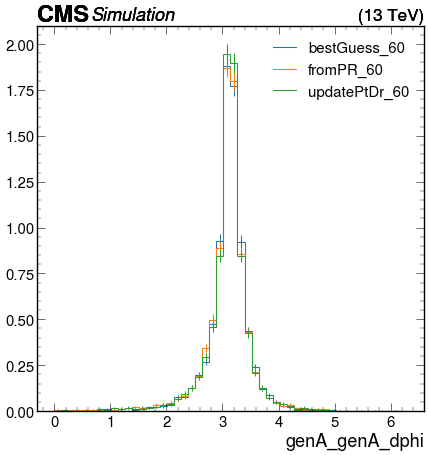

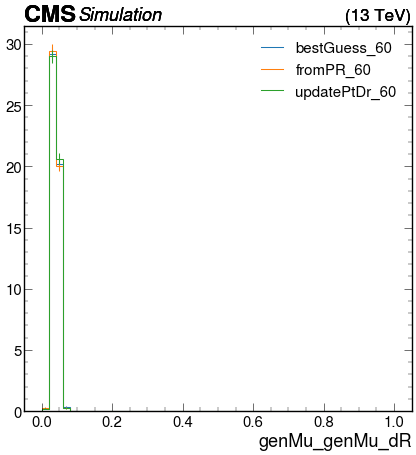

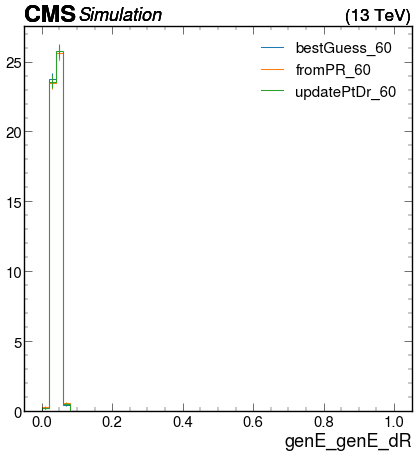

In [9]:
channel = "2mu2e"
hists = ["genA_genA_dphi", "genMu_genMu_dR", "genE_genE_dR"]
subsamples = ["bestGuess_60","fromPR_60","updatePtDr_60"]
#subsamples = ["bestGuess_60","fromPR_60","removeNewgToF_60","updatePtDr_60","xqcut_60"]
#subsamples = samples

for hist in hists:
    for subsample in subsamples:
        utilities.plot(output[subsample]["hists"][hist][channel,:], density=True)
    
    #plt.yscale("log")
    
    plt.legend(subsamples,loc='upper right')
    plt.show()

# Plot all the histograms!

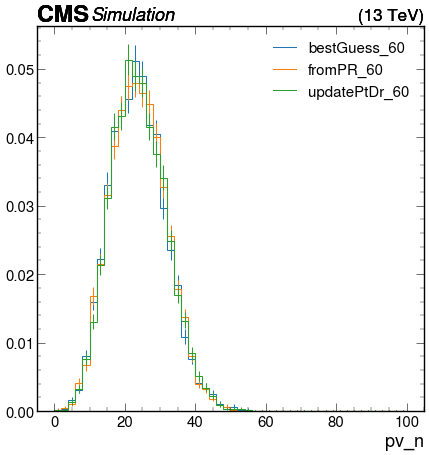

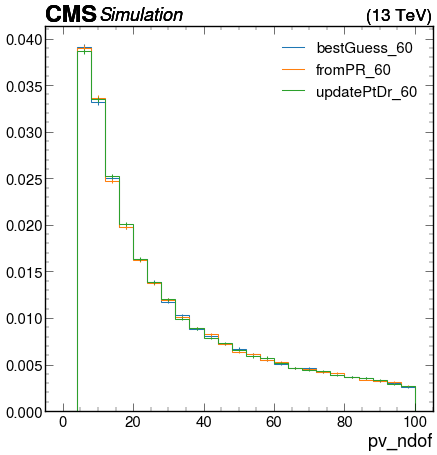

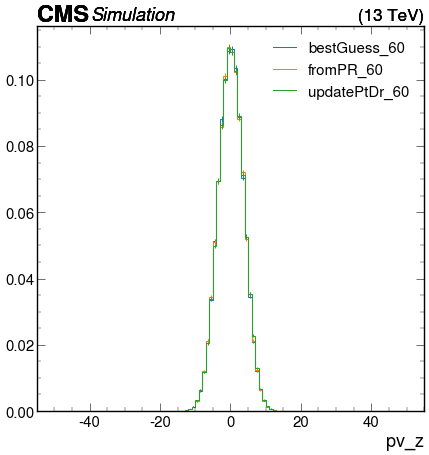

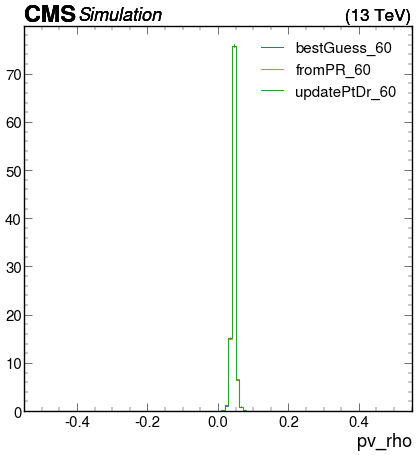

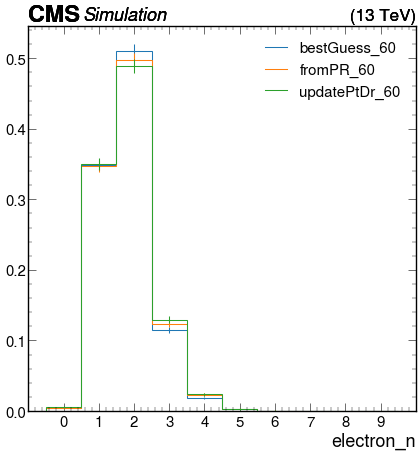

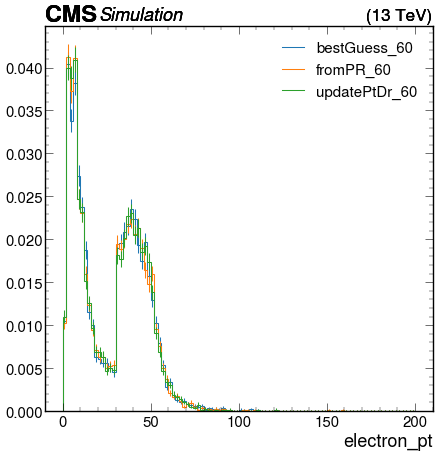

Not showing histogram  electron_eta_phi


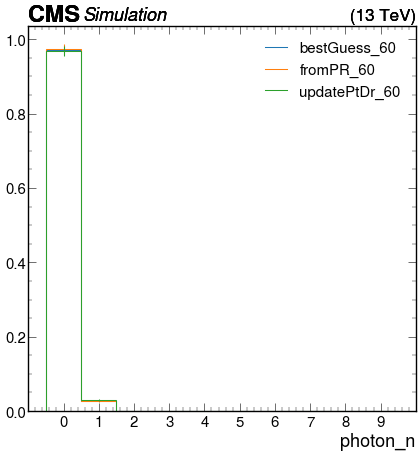

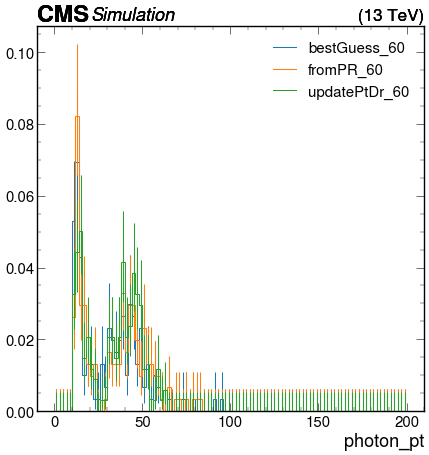

Not showing histogram  photon_eta_phi


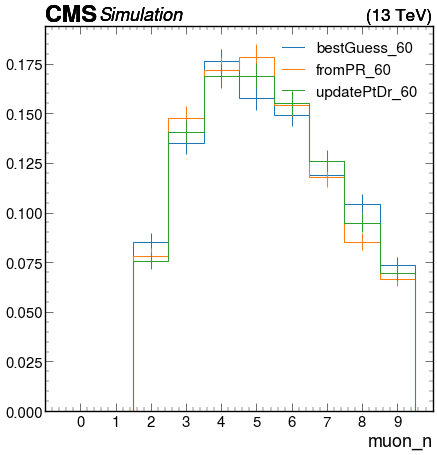

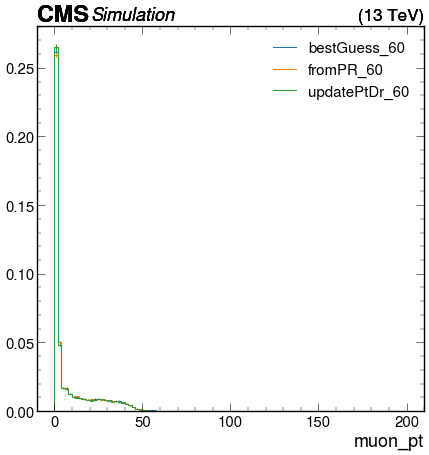

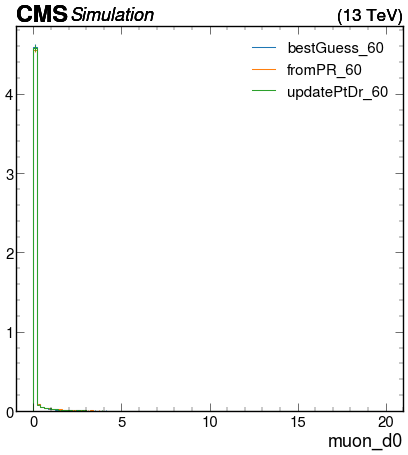

Not showing histogram  muon_eta_phi


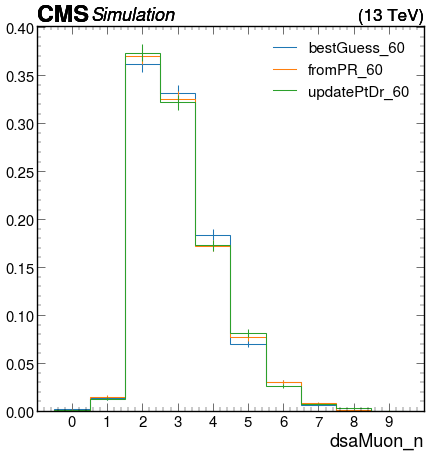

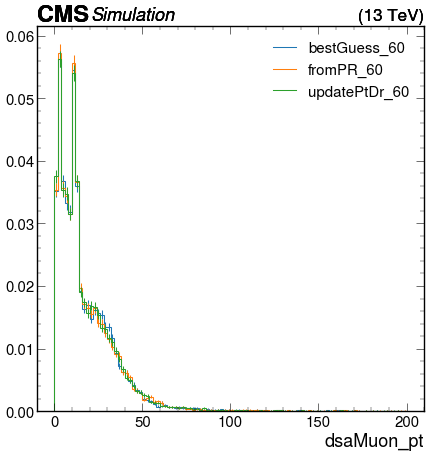

Not showing histogram  dsaMuon_eta_phi


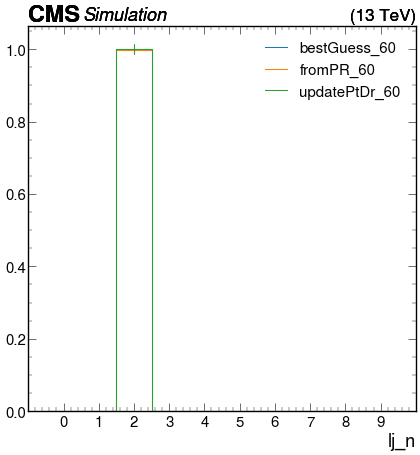

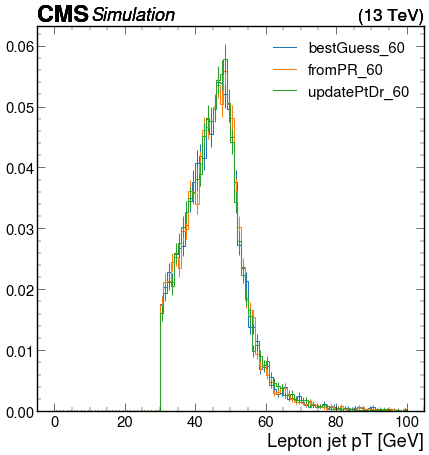

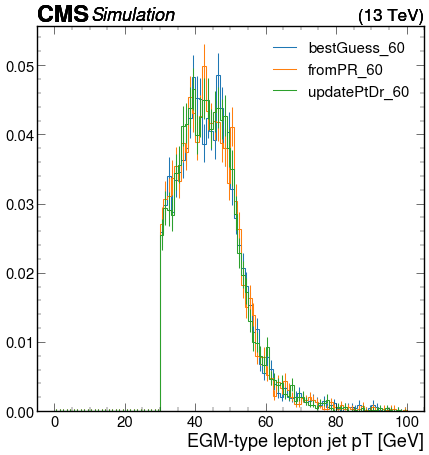

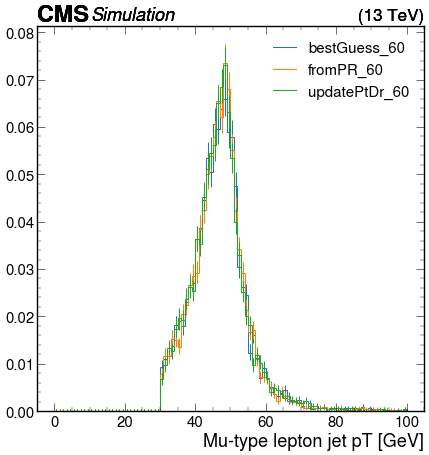

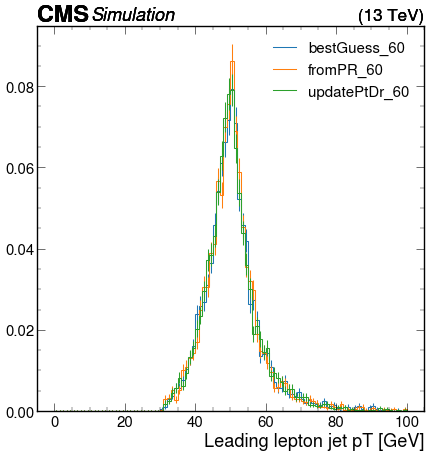

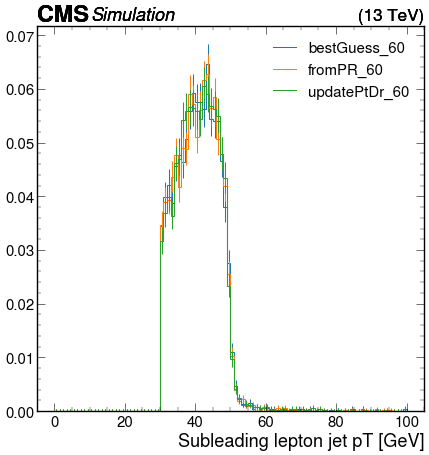

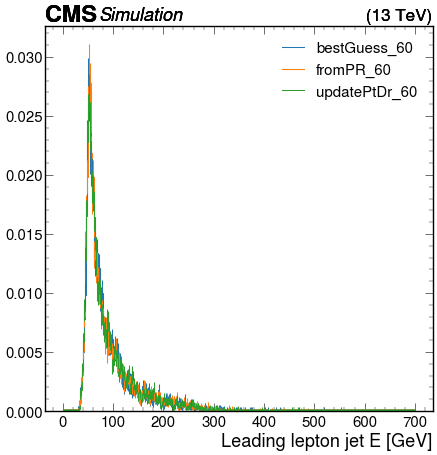

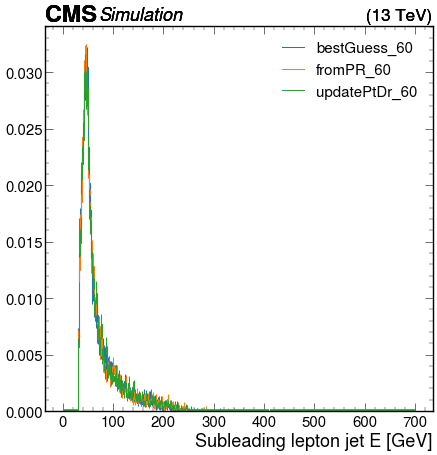

Not showing histogram  lj_eta_phi


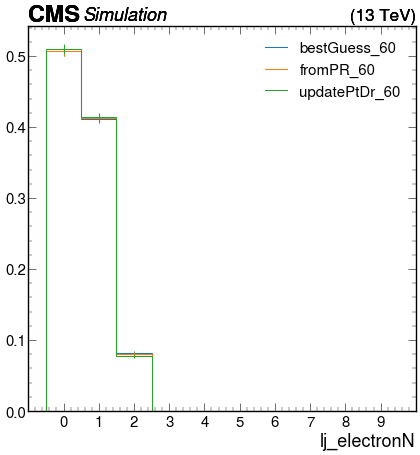

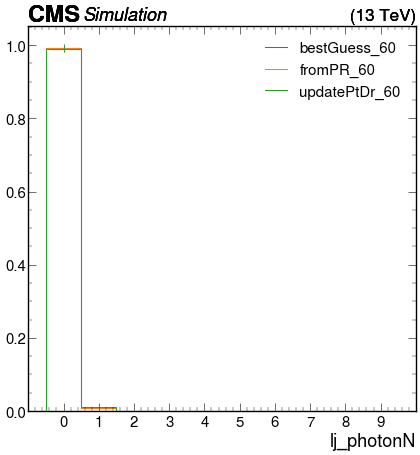

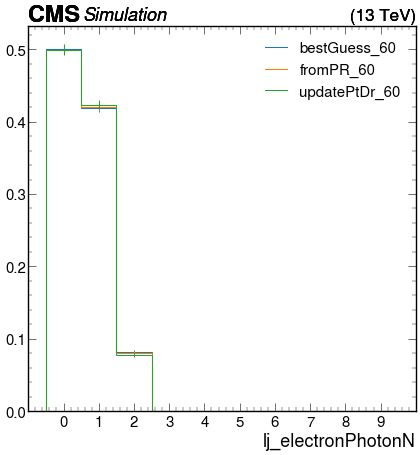

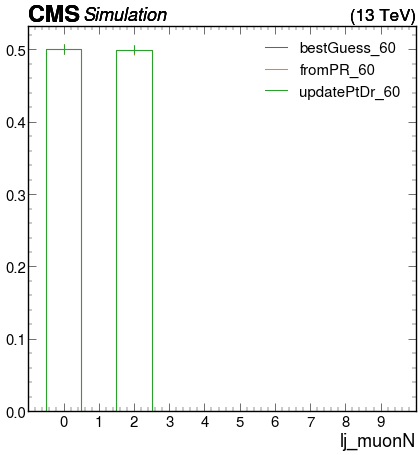

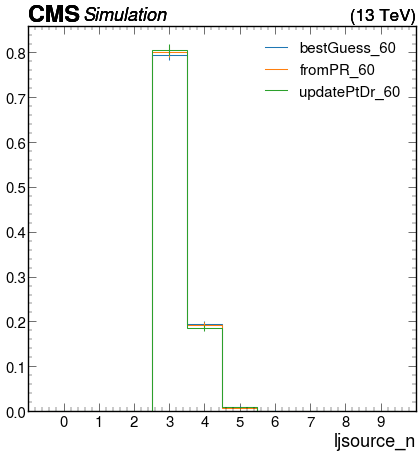

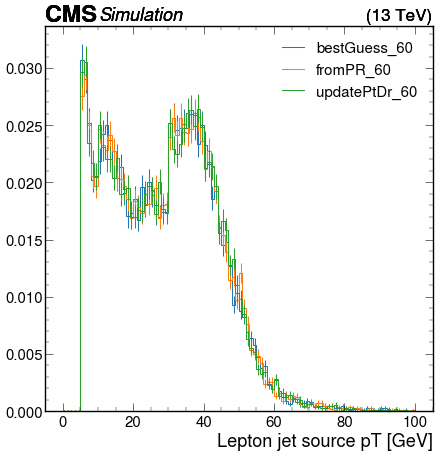

Not showing histogram  ljsource_eta_phi


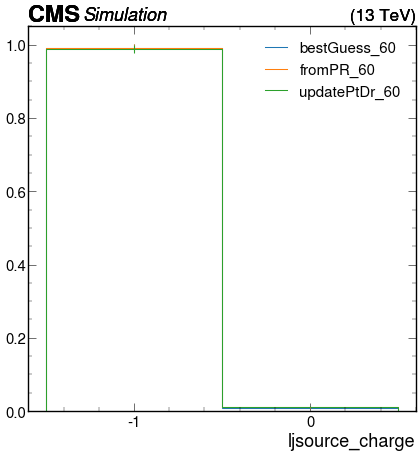

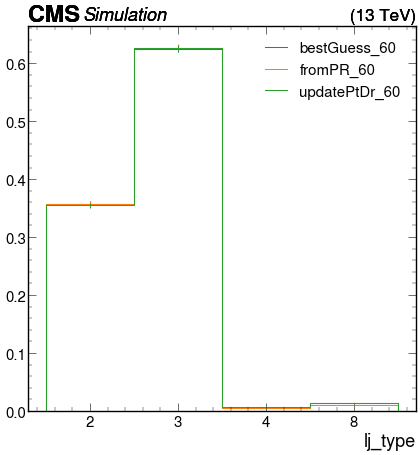

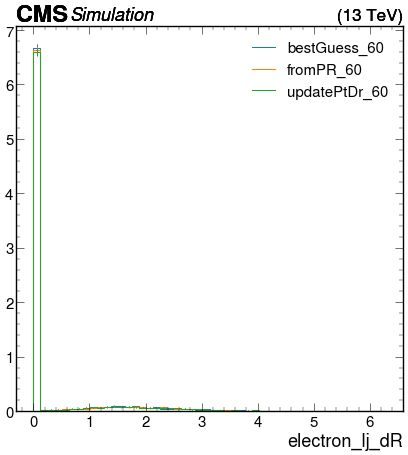

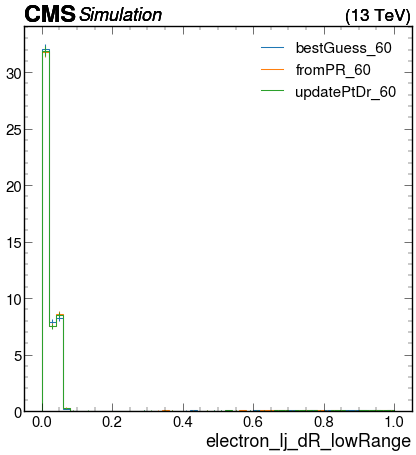

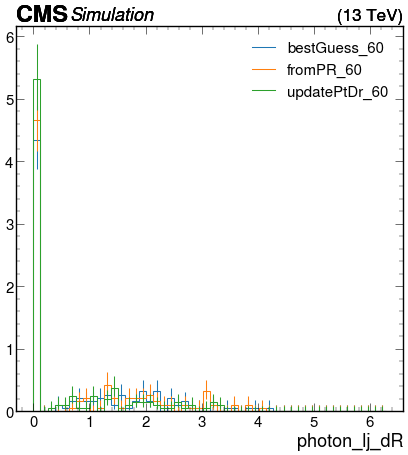

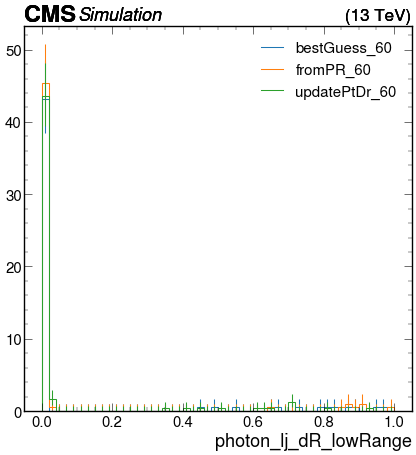

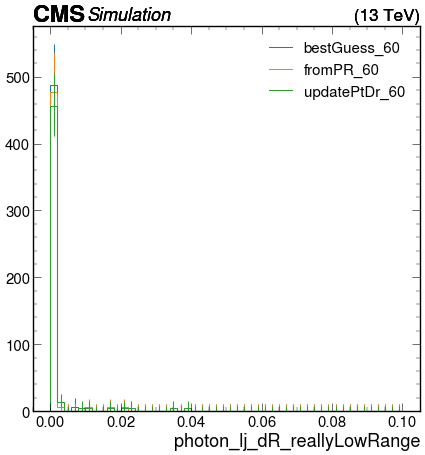

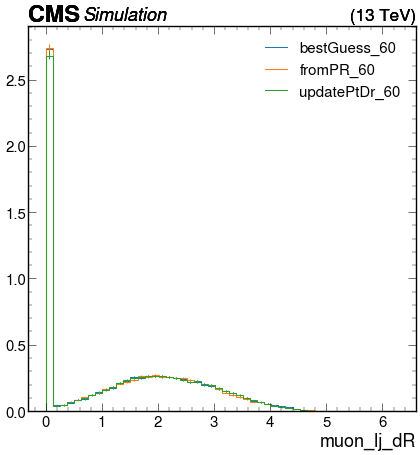

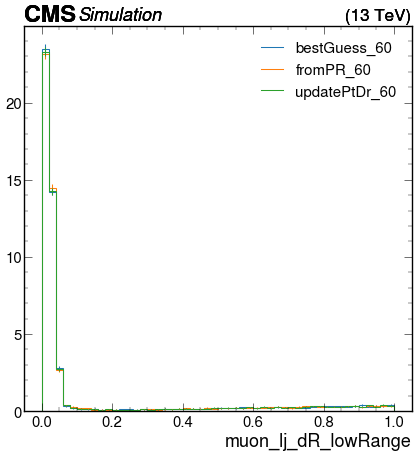

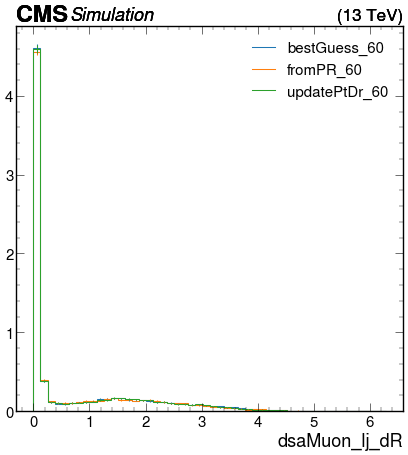

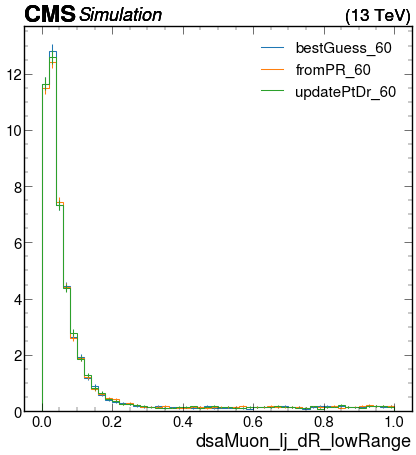

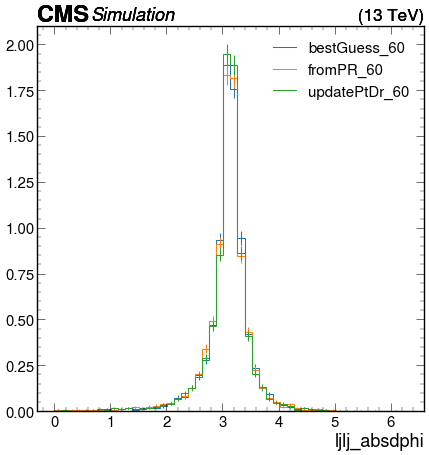

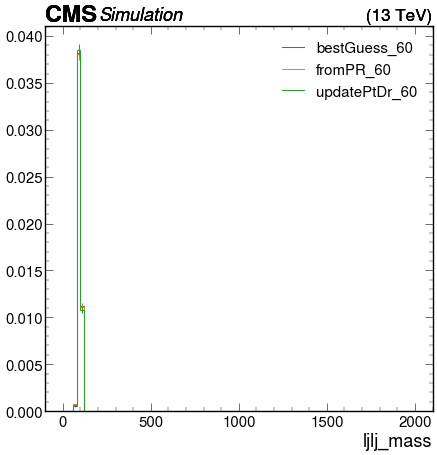

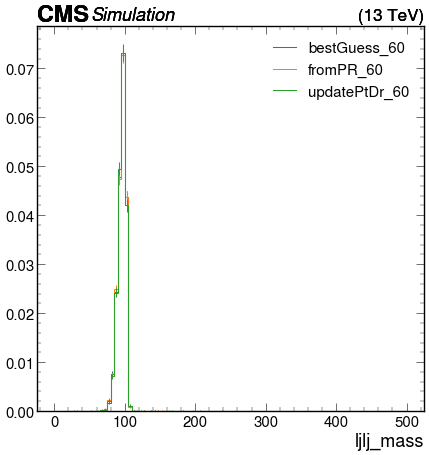

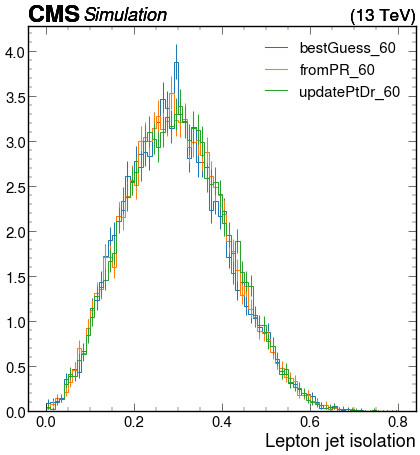

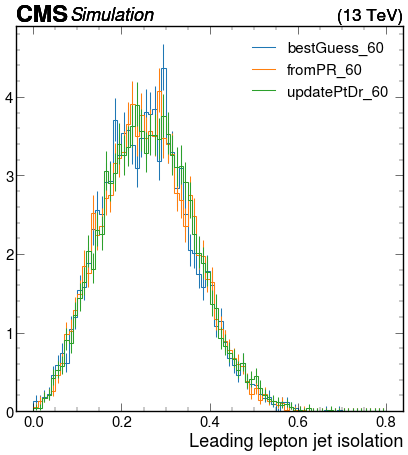

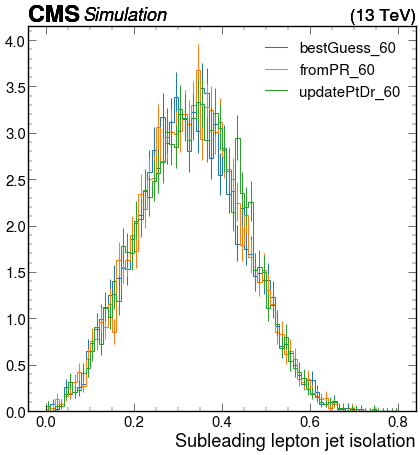

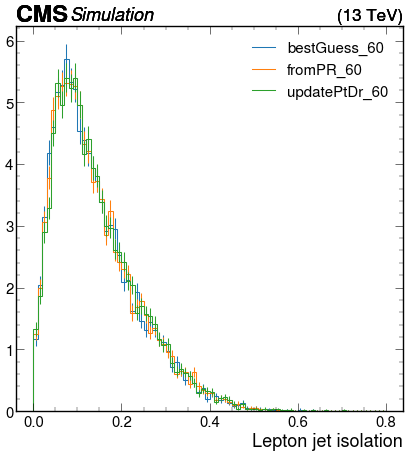

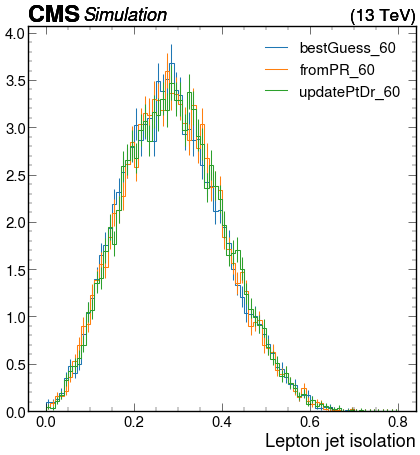

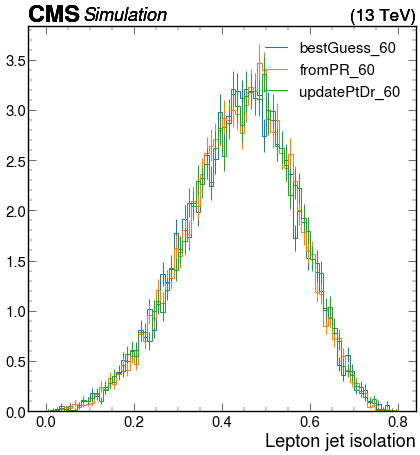

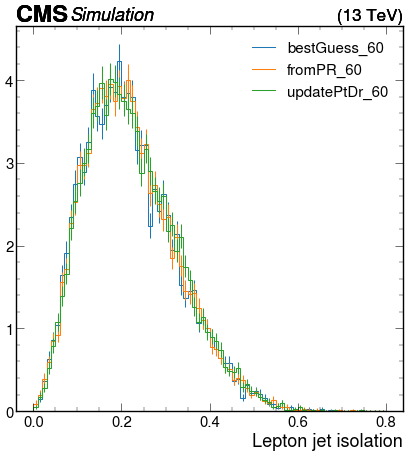

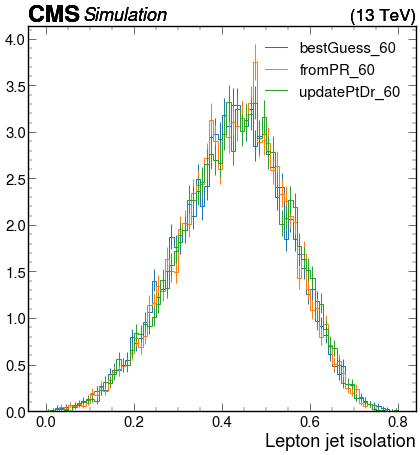

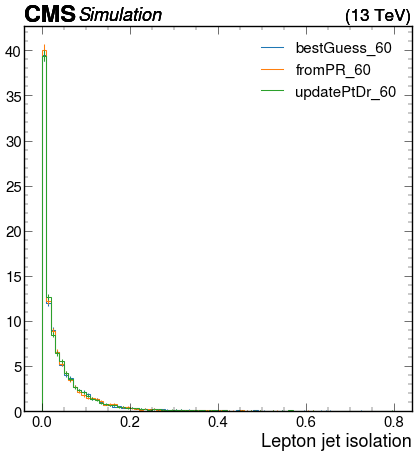

Not showing histogram  abcd_lj_lj_dphi_vs_lj0_pfIsolationPt05


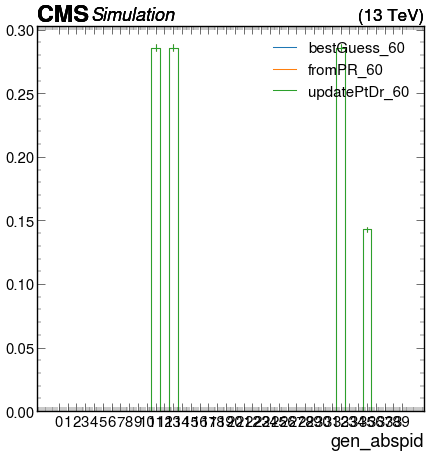

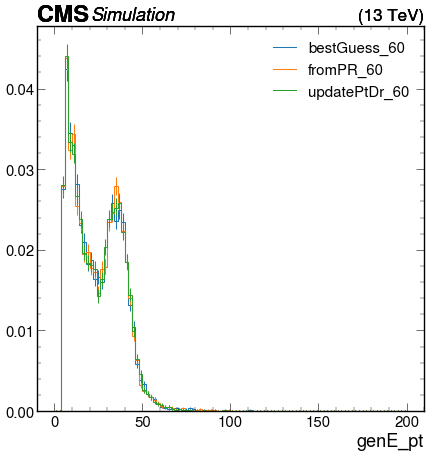

Not showing histogram  genE_eta_phi


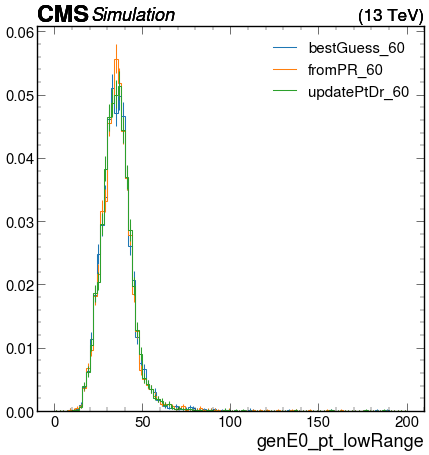

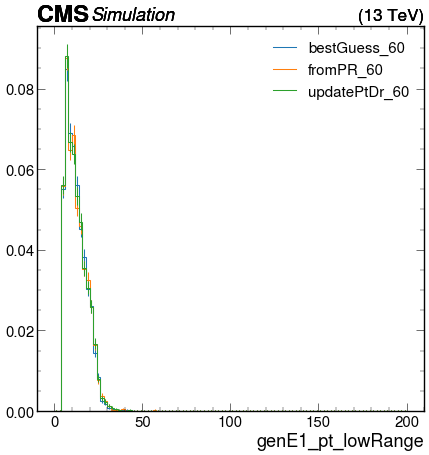

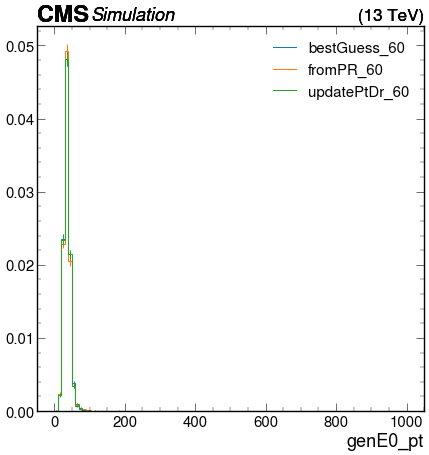

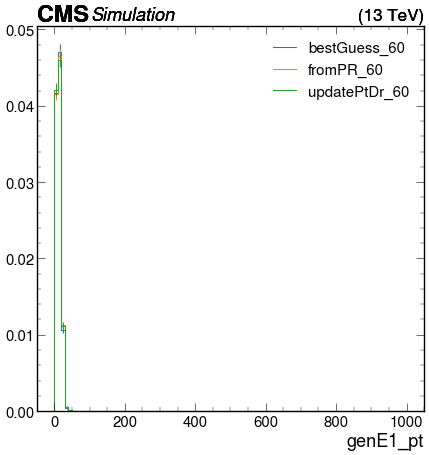

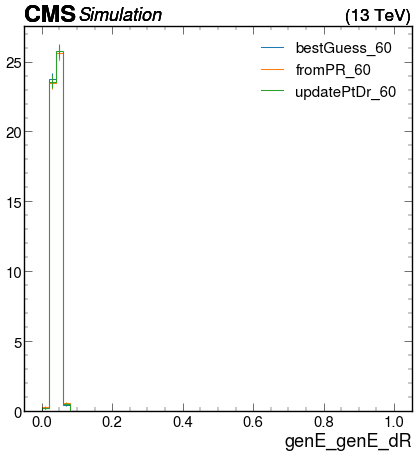

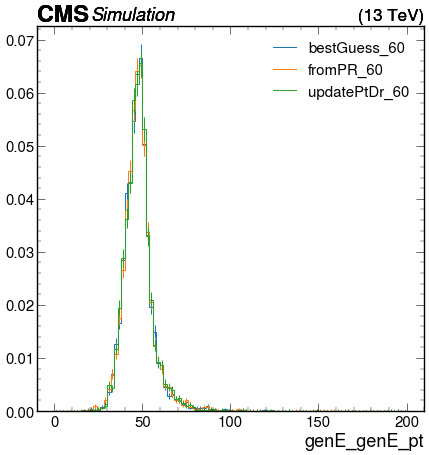

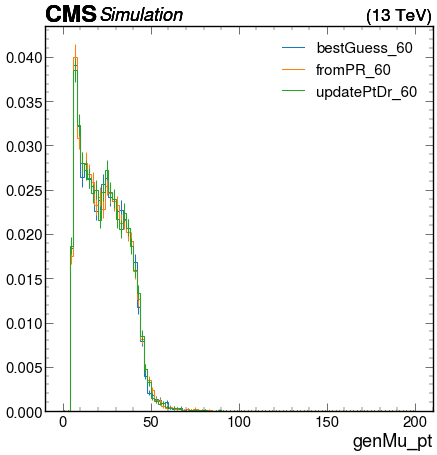

Not showing histogram  genMu_eta_phi


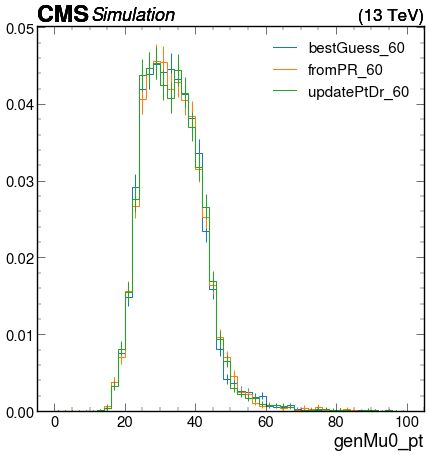

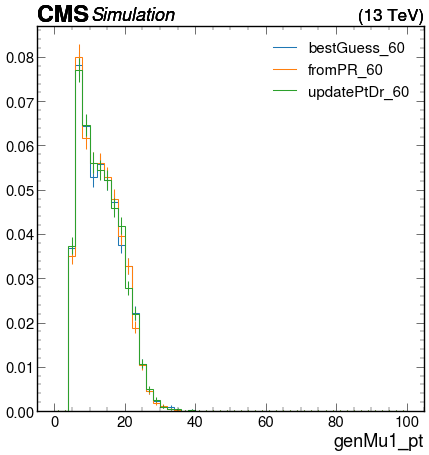

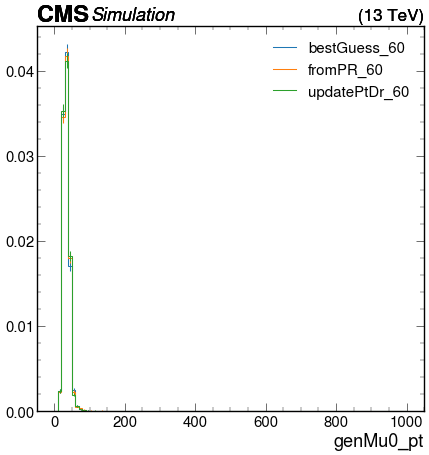

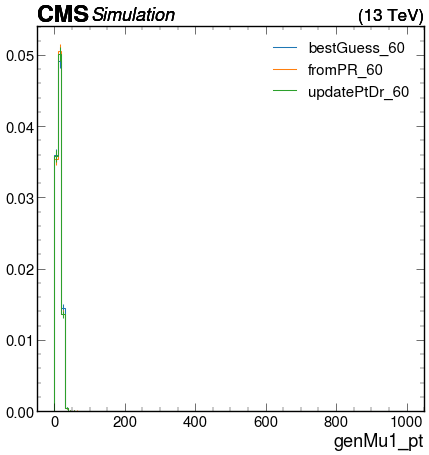

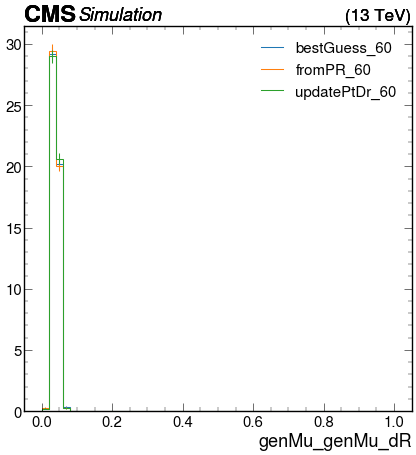

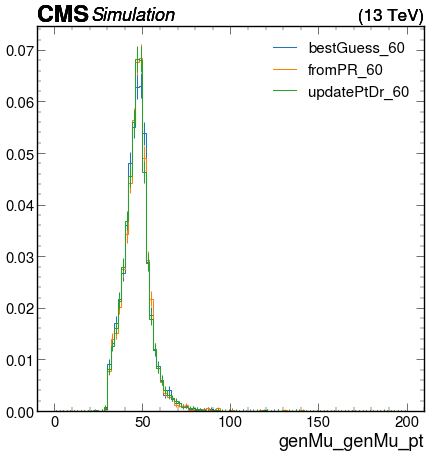

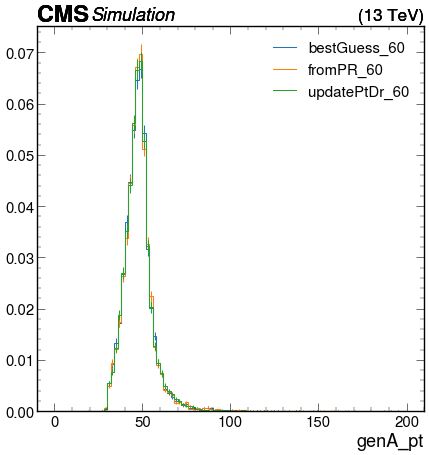

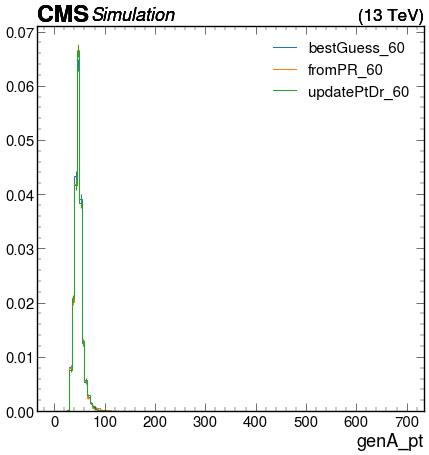

Not showing histogram  genA_eta_phi


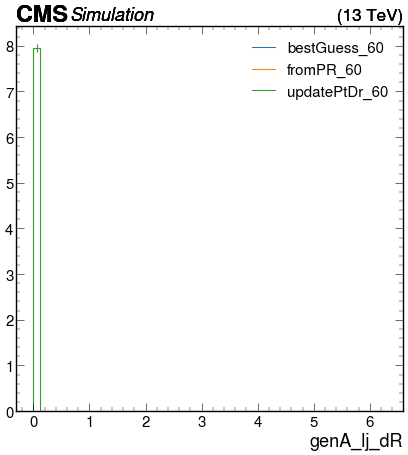

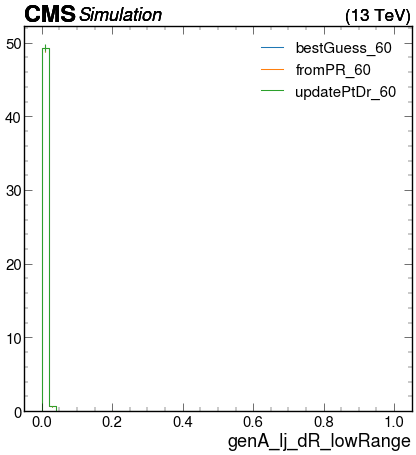

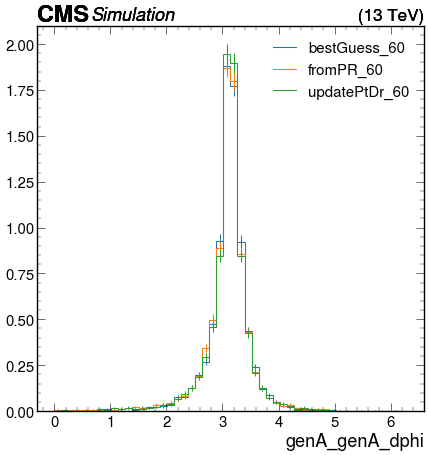

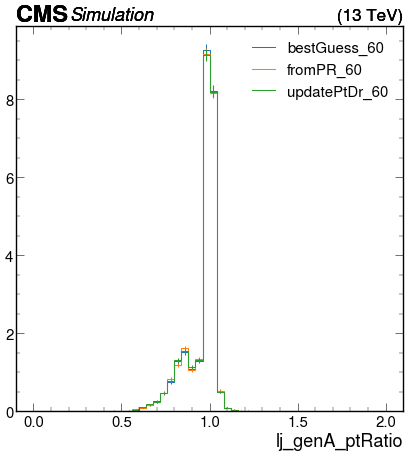

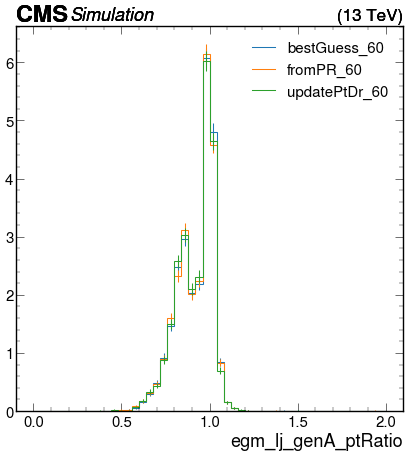

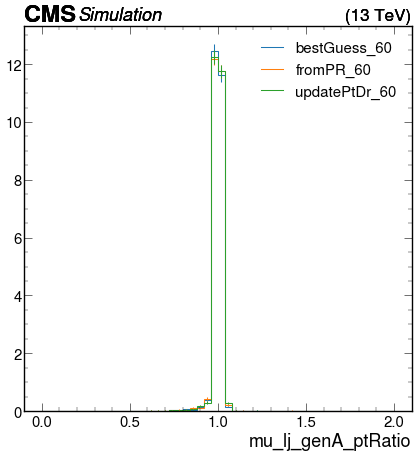

In [10]:
channel = "2mu2e"
#subsamples = samples
#subsamples = ["bestGuess_60","fromPR_60","updatePtDr_60"]


for hist in output["bestGuess_6"]["hists"]:
    if len(output["bestGuess_6"]["hists"][hist].axes)== 2:
        for subsample in subsamples:
            utilities.plot(output[subsample]["hists"][hist][channel,:], density=True)
    
        #plt.yscale("log")
    
        plt.legend(subsamples,loc='upper right')
        plt.show()
    else:
        print("Not showing histogram ", hist)